In [76]:
import pandas as pd
import numpy as np
train = pd.read_excel('Train_dataset.xlsx')
test  = pd.read_excel('Test_dataset.xlsx')


Filling empty values with the mean values(in case of float64/int64) or filling it with Nil values(in case of string type columns)

In [77]:
means = train.mean()
d = {'comorbidity':['Nil'],'cardiological pressure':['Normal'],'Occupation':['Nil'],'Mode_transport':['Nil'],'Married':['NO'],'Region':['Nil'],'Gender':['Male']}
train.fillna(value=means,inplace=True)
train.head()
train.fillna(value=pd.DataFrame.from_dict(d),inplace=True)
test.fillna(value=means,inplace=True)
test.head()
test.fillna(value=pd.DataFrame.from_dict(d),inplace=True)

In [78]:
train_df = train.drop(['Name','Region','Designation'],1)
test_df = test.drop(['Name','Region','Designation'],1)
test_df['Infect_Prob'] = np.zeros(test.shape[0])
merge = pd.concat([train_df,test_df], sort=False)
for column in train_df.columns:
    if (merge[column].dtype == object):
        train_df[column].fillna(f"NaN_{column}",inplace = True)
    else:
        train_df[column].fillna(0,inplace = True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 25 columns):
people_ID                 10714 non-null int64
Gender                    10714 non-null object
Married                   10714 non-null object
Children                  10714 non-null float64
Occupation                10714 non-null object
Mode_transport            10714 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10714 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10714 non-null object
Diuresis                  10714 non-null float64
Platelets                 10714 non-null float64
HBB                       10714 non-null float64
d-dimer                   10714 non-null float64
Heart rate                10714 non-null float64
HDL cholesterol           

One Hot Encoding

In [79]:
object_columns = train_df.select_dtypes(include=['object']).columns

temp = pd.concat([train_df[object_columns],test_df[object_columns]], sort=False) 
temp = pd.get_dummies(temp)

len_train=train_df.shape[0]
cat_train_data = temp[:len_train]
cat_test_data = temp[len_train:]

print(cat_train_data.head())

num_train_data = train_df.select_dtypes(include=['int64','float64'])
num_test_data = test_df.select_dtypes(include=['int64','float64'])

train_data = pd.concat([num_train_data,cat_train_data],axis = 1)
test_data = pd.concat([num_test_data,cat_test_data],axis = 1)
test_data.drop(columns=['Infect_Prob'],inplace = False)
print(train_data.head())



   Gender_Female  Gender_Male  Married_NO  Married_YES  Occupation_Business  \
0              1            0           0            1                    0   
1              1            0           0            1                    0   
2              1            0           1            0                    0   
3              1            0           0            1                    0   
4              1            0           1            0                    0   

   Occupation_Cleaner  Occupation_Clerk  Occupation_Driver  Occupation_Farmer  \
0                   0                 0                  0                  1   
1                   0                 0                  0                  1   
2                   1                 0                  0                  0   
3                   0                 0                  1                  0   
4                   0                 0                  0                  0   

   Occupation_Legal  ...  comorbidity_

Visualising the Correlations

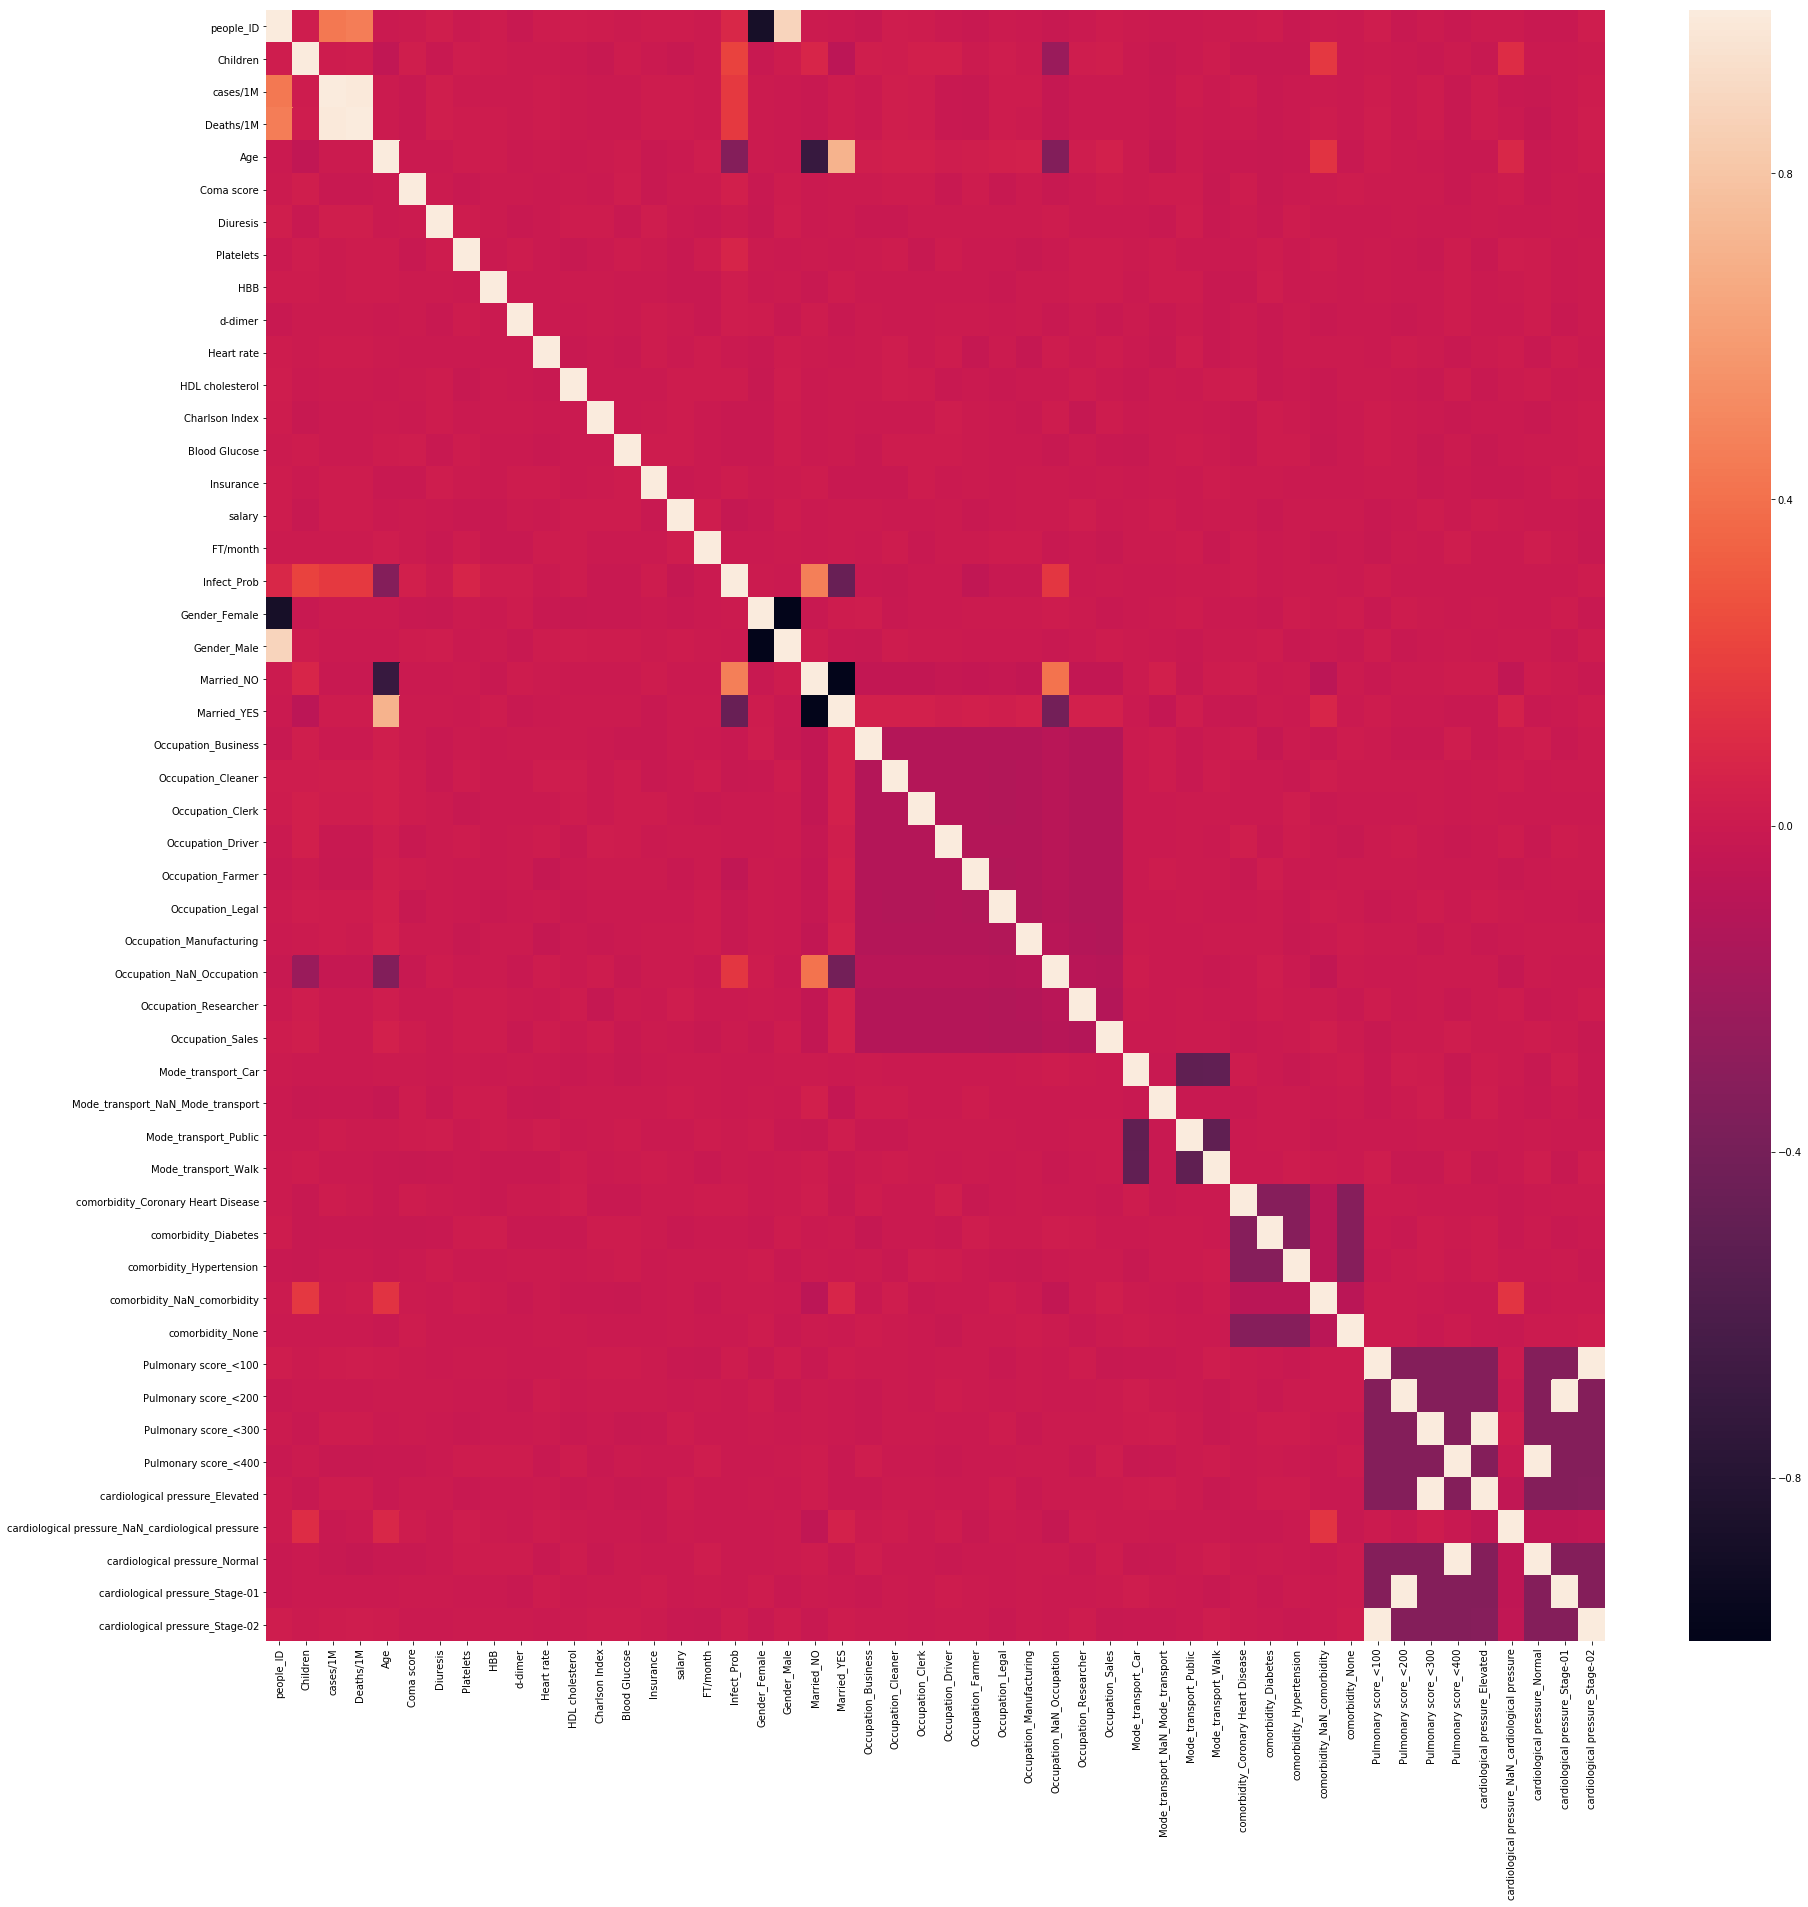

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(train_data.corr())

Splitting the train data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns =['Infect_Prob'],inplace=False), train_df['Infect_Prob'], test_size=0.1, random_state=101)

Random Forest Regressor

In [6]:
print(X_train.shape)
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 250, max_depth = 15, random_state = 0) 
regressor.fit(X_train, y_train)   

(9642, 49)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
from sklearn.metrics import mean_squared_error as mse
y_p = regressor.predict(X_test)
mse(y_p,y_test)

83.17820441111523

Linear Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
mse(linear.predict(X_test),y_test)

91.96208666676607

Polynomial Regression

In [ ]:
p = PolynomialFeatures(3)
poly_train = p.fit_transform(X_train)
linear.fit(poly_train,y_train)
poly_test = p.fit_transform(X_test)
print(linear.score(poly_test,y_test))
mse(linear.predict(poly_test),y_test)

<b>DIURESIS PREDICTION</b>

In [9]:
xls = pd.ExcelFile('Train_dataset.xlsx')
diu_train = pd.read_excel(xls, 'Diuresis_TS')
diu_train.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [10]:
#Checking for null values
diu_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 8 columns):
people_ID              10714 non-null int64
2020-03-20 00:00:00    10714 non-null int64
2020-03-21 00:00:00    10714 non-null float64
2020-03-22 00:00:00    10714 non-null float64
2020-03-23 00:00:00    10714 non-null float64
2020-03-24 00:00:00    10714 non-null float64
2020-03-25 00:00:00    10714 non-null float64
2020-03-26 00:00:00    10714 non-null float64
dtypes: float64(6), int64(2)
memory usage: 669.7 KB


In [11]:
import matplotlib.pyplot as plt
only_rates = diu_train.drop('people_ID',1,inplace = False)

plt.plot([0,1,2,3,4,5,6],only_rates.iloc[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
only_rates.shape

(10714, 7)

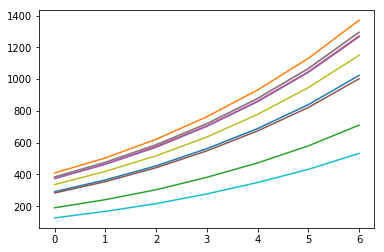

In [13]:
import random
for i in range(10):
    plt.plot([0,1,2,3,4,5,6],only_rates.iloc[random.randint(0,10714)])
plt.show()

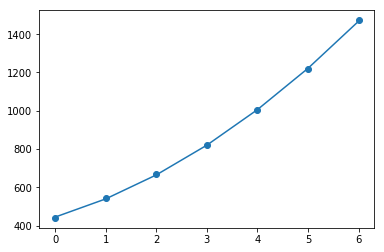

In [14]:
import operator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform((np.array([0,1,2,3,4,5,6])).reshape(7,-1))
model = LinearRegression()
model.fit(x_poly, only_rates.iloc[0])
y_poly_pred = model.predict(x_poly)
plt.scatter([0,1,2,3,4,5,6],only_rates.iloc[0])
plt.plot([0,1,2,3,4,5,6],y_poly_pred)

A Quadratic fits it substantially well

In [15]:
y = []
for i in range(10714):
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform((np.array([0,1,2,3,4,5,6])).reshape(7,-1))
    model = LinearRegression()
    model.fit(x_poly, only_rates.iloc[i])
    y.append(model.predict(polynomial_features.fit_transform(np.array([7]).reshape(1, 1))))

In [23]:
y_ = np.array(y)
diu_pred = pd.DataFrame(data = y_, columns=['Diuresis'])
diu_pred.to_excel('diuresis_prediciton.xls')

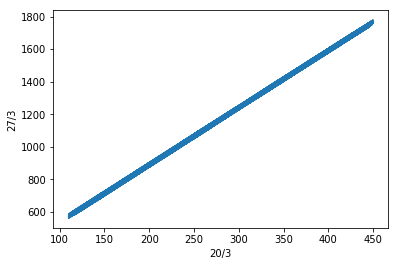

In [33]:
plt.xlabel('20/3')
plt.ylabel('27/3')
plt.plot(only_rates.iloc[:,0],y_)

The relationship is approximately linear

In [38]:
X_train, X_test, y_train, y_test = train_test_split(only_rates.iloc[:,0], y_, test_size=0.1, random_state=101)

In [67]:
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

26.966008234770843

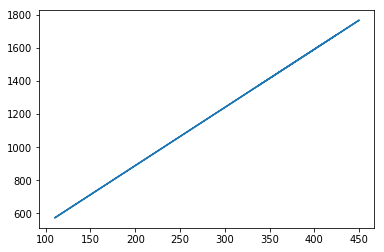

In [75]:
y_pred = model.predict(np.array(X_test).reshape(-1,1))
plt.plot(X_test,y_pred)
mse(y_pred,y_test)

In [47]:
model.score(np.array(X_test).reshape(-1,1),y_test)


0.9997811770023969

In [84]:
predictions_20 = regressor.predict(test_data.drop(columns='people_ID',inplace=False))
pd.DataFrame(data=np.vstack((test_data['people_ID'], predictions_20)).T,columns=['people_ID','infect_prob']).to_excel('Mar20th.xls')

In [91]:
test_27 = test_data.copy()
y_pred  = model.predict(np.array(test_data['Diuresis']).reshape(-1,1))
test_27['Diuresis']  = y_pred
mse(test_data['Diuresis'],test_27['Diuresis'])

854879.1223542318

Tuning the regressor

In [98]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [99]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns =['Infect_Prob'],inplace=False), train_df['Infect_Prob'], test_size=0.1, random_state=101)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 51.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [110]:
best_random = rf_random.best_estimator_
predictions_20 = best_random.predict(test_27.drop(columns='people_ID',inplace=False))
predictions_27 = best_random.predict(test_data.drop(columns='people_ID',inplace=False))
pd.DataFrame(data=np.vstack((test_data['people_ID'], predictions_20)).T,columns=['people_ID','infect_prob']).to_excel('Mar20th.xls')
pd.DataFrame(data=np.vstack((test_data['people_ID'], predictions_27)).T,columns=['people_ID','infect_prob']).to_excel('Mar27th.xls')

In [102]:
mse(regressor.predict(X_test),y_test)

83.17820441111523